In [ ]:
import datetime
import sys
import os
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns
import plotly.figure_factory as ff
from collections import Counter
from sklearn.manifold import TSNE
from scipy import stats

In [ ]:
#!pip install "git+https://github.com/nvictus/datashader.git@mpl"


In [ ]:
#from functools import partial

#import datashader as ds
#from datashader.mpl_ext import dsshow

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#outputs AE model (org lc length)
df_AE = pd.read_csv('/content/drive/MyDrive/CSAGNs/results_DR5/AE_psDR5_SDSS_QSO_balanced_detprop_GRU2x32-encoding16_gband/DR5_final_sample_encoding_features_chi2_isolation_forest_score_training_with_balqsosample_typecat_gband.csv')
df_AE.head()

,oid_alerce,objID,meanra,meandec,n_good_det,timespan_good,T2020_sigma2,mhps_ratio,mhps_low,mhps_high,mhps_non_zero,mhps_PN_flag,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Con,Eta_e,Gskew,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,Q31,PeriodLS_v2,Period_fit_v2,Psi_CS_v2,Psi_eta_v2,Rcs,Skew,SmallKurtosis,Std,StetsonK,Pvar,ExcessVar,GP_DRW_sigma,GP_DRW_tau,...,Harmonics_mag_1,Harmonics_mag_2,Harmonics_mag_3,Harmonics_mag_4,Harmonics_mag_5,Harmonics_mag_6,Harmonics_mag_7,Harmonics_phase_2,Harmonics_phase_3,Harmonics_phase_4,Harmonics_phase_5,Harmonics_phase_6,Harmonics_phase_7,Harmonics_mse,ps_score,index,chi2_gband,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,if_score,name,ra,dec,z,type,Separation
0,5.671073e+14,128991227891050164,122.789141,17.491381,115.0,1005.222361,0.012156,7.912047,0.085954,0.010864,108.0,0.0,0.259862,0.859679,3.0,0.313043,0.008850,0.025030,-0.138782,2.974835,19.396828,0.006802,0.093464,0.373913,-0.100000,0.023395,0.173080,0.996314,0.017997,0.217096,1.421289,0.288329,-0.455562,0.459760,0.131940,0.797547,1.0,0.000032,0.012800,20.876998,...,0.117981,0.023376,0.025745,0.003104,0.022032,0.028692,0.020338,4.427755,0.366819,5.075858,2.302104,3.524003,3.083117,0.009883,0.500012,17,1.828582,0.091666,-0.540374,-0.157439,0.008834,0.005836,-0.180024,0.167386,0.004506,0.084435,0.167721,0.012799,-0.104322,0.208223,0.276402,-0.178931,-0.135784,-0.434119,SDSS J081109.38+172928.9,122.789120,17.491364,0.39000,Q,0.095783
1,5.771083e+14,129061912450800357,191.245111,17.549904,195.0,1029.145243,0.110788,90.011810,0.137633,0.001529,189.0,0.0,0.581310,1.000000,26.0,0.184615,0.031088,0.020837,0.474492,127.131562,17.880150,0.018646,0.228102,0.302564,-0.033333,0.053879,0.452179,0.499650,0.184643,0.337357,0.317350,0.397157,0.809860,-0.208060,0.333392,0.850496,1.0,0.000345,0.209143,1377.865713,...,0.317948,0.080196,0.054763,0.049547,0.024275,0.020615,0.042515,0.316785,0.580712,1.171844,0.221789,1.206608,1.289338,0.029929,0.500048,17,6.167194,-0.060758,0.674325,0.316303,-0.076920,0.313585,-0.063367,0.027048,-0.172883,-0.342404,-0.310721,0.054515,-0.212555,-0.339523,-0.130777,0.092885,0.003559,-0.515375,LBQS 1242+1749,191.245100,17.549883,0.26000,AX,0.083568
2,7.221141e+14,160532455281712901,245.528145,43.776883,616.0,1029.153993,0.012472,11.937757,0.070343,0.005892,614.0,0.0,0.327818,1.000000,3.0,0.275974,0.001629,0.923982,0.077017,514.679811,20.113031,0.008153,0.094512,0.644481,-0.033333,0.033363,0.188248,0.499002,0.031902,0.188164,1.554734,0.227296,0.218903,1.063115,0.163972,0.745927,1.0,0.000031,0.026396,23.568736,...,0.077969,0.003677,0.031807,0.019857,0.009979,0.007633,0.004551,0.357652,1.632965,2.139763,1.235419,0.797533,4.057636,0.023111,0.500071,43,1.242202,0.089642,0.257739,0.054127,-0.104752,0.154079,-0.200486,0.011360,-0.015179,-0.163884,-0.316175,-0.047968,-0.040809,0.053424,-0.138344,0.161884,-0.273135,-0.428191,SDSS J162206.75+434636.7,245.528148,43.776861,0.66000,Q,0.079635
3,8.201032e+14,179911904884780129,190.488592,59.924532,252.0,1029.145150,0.021754,5.098682,0.062686,0.012295,242.0,0.0,0.423660,0.854725,31.0,0.329365,0.000000,0.594593,-0.106319,463.395560,20.373350,0.010628,0.140471,0.448413,0.166667,0.039581,0.280755,1.000801,0.046654,0.210989,1.016934,0.360483,-0.360105,0.235382,0.216532,0.777910,1.0,0.000052,0.036951,531.129620,...,0.227092,0.117356,0.084581,0.070529,0.044275,0.033687,0.022551,3.966472,2.035452,1.407893,5.629778,4.707702,3.092977,0.023157,0.500089,59,0.900169,0.188410,-0.179840,-0.394251,-0.045179,-0.065186,-0.259273,0.144108,-0.048794,-0.069402,0.096839,0.048264,-0.001902,0.152321,0.115272,0.092472,-0.172588,-0.417412,SDSS J124157.25+595528.1,190.488562,59.924505,0.63000,Q,0.110378
4,5.701162e+14,134401419923113167,141.992348,22.002198,127.0,1030.149630,0.027912,19.232981,0.128253,0.006668,119.0,0.0,0.335125,0.999826,7.0,0.307087,0.008000,0.052750,0.228912,56.077324,17.522600,0.009591,0.116814,0.377953,0.233333,0.028874,0.227078,0.998702,

In [ ]:
df_AE_old = pd.read_csv('/content/drive/MyDrive/CSAGNs/results_DR5/AE_psDR5_SDSS_QSO_balanced_GRU2x32-encoding16_gband/DR5_final_sample_encoding_features_chi2_isolation_forest_score_training_with_balqsosample_lowchi2_gband.csv')
df_AE_old.head()

,oid_alerce,objID,meanra,meandec,n_good_det,timespan_good,T2020_sigma2,mhps_ratio,mhps_low,mhps_high,mhps_non_zero,mhps_PN_flag,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Con,Eta_e,Gskew,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,Q31,PeriodLS_v2,Period_fit_v2,Psi_CS_v2,Psi_eta_v2,Rcs,Skew,SmallKurtosis,Std,StetsonK,Pvar,ExcessVar,GP_DRW_sigma,GP_DRW_tau,SF_ML_amplitude,SF_ML_gamma,IAR_phi,LinearTrend,Harmonics_mag_1,Harmonics_mag_2,Harmonics_mag_3,Harmonics_mag_4,Harmonics_mag_5,Harmonics_mag_6,Harmonics_mag_7,Harmonics_phase_2,Harmonics_phase_3,Harmonics_phase_4,Harmonics_phase_5,Harmonics_phase_6,Harmonics_phase_7,Harmonics_mse,ps_score,index,chi2_gband,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,if_score
0,5.671073e+14,128991227891050164,122.789141,17.491381,115.0,1005.222361,0.012156,7.912047,0.085954,0.010864,108.0,0.0,0.259862,0.859679,3.0,0.313043,0.008850,0.025030,-0.138782,2.974835,19.396828,0.006802,0.093464,0.373913,-0.100000,0.023395,0.173080,0.996314,0.017997,0.217096,1.421289,0.288329,-0.455562,0.459760,0.131940,0.797547,1.000000,0.000032,0.012800,20.876998,0.172937,0.248272,0.971170,0.000075,0.117981,0.023376,0.025745,0.003104,0.022032,0.028692,0.020338,4.427755,0.366819,5.075858,2.302104,3.524003,3.083117,0.009883,0.500012,17,2.323065,0.107996,0.011640,0.076361,-0.032626,-0.109608,-0.185811,0.502419,-0.291775,0.173649,0.000557,0.137211,0.716056,-0.155265,0.468816,-0.089407,-0.098401,-0.506493
1,7.221141e+14,160532455281712901,245.528145,43.776883,616.0,1029.153993,0.012472,11.937757,0.070343,0.005892,614.0,0.0,0.327818,1.000000,3.0,0.275974,0.001629,0.923982,0.077017,514.679811,20.113031,0.008153,0.094512,0.644481,-0.033333,0.033363,0.188248,0.499002,0.031902,0.188164,1.554734,0.227296,0.218903,1.063115,0.163972,0.745927,1.000000,0.000031,0.026396,23.568736,0.185958,0.287843,0.988492,0.000019,0.077969,0.003677,0.031807,0.019857,0.009979,0.007633,0.004551,0.357652,1.632965,2.139763,1.235419,0.797533,4.057636,0.023111,0.500071,43,1.635397,-0.706366,-0.113100,0.261594,-0.081918,-0.338360,0.218686,-0.477804,0.154115,-0.115604,-0.401991,-0.471554,0.014879,0.082288,-0.629301,0.434120,-0.041581,-0.541521
2,8.201032e+14,179911904884780129,190.488592,59.924532,252.0,1029.145150,0.021754,5.098682,0.062686,0.012295,242.0,0.0,0.423660,0.854725,31.0,0.329365,0.000000,0.594593,-0.106319,463.395560,20.373350,0.010628,0.140471,0.448413,0.166667,0.039581,0.280755,1.000801,0.046654,0.210989,1.016934,0.360483,-0.360105,0.235382,0.216532,0.777910,1.000000,0.000052,0.036951,531.129620,0.109169,0.251506,0.999177,0.000520,0.227092,0.117356,0.084581,0.070529,0.044275,0.033687,0.022551,3.966472,2.035452,1.407893,5.629778,4.707702,3.092977,0.023157,0.500089,59,1.097790,-0.136740,0.227202,-0.068726,-0.294567,-0.150514,0.002173,0.233690,-0.136166,-0.152336,-0.048427,0.235247,0.493034,0.020019,-0.076372,-0.073328,0.116898,-0.447456
3,5.501153e+14,133783599129463414,359.912968,21.485704,157.0,955.692338,0.023485,11.937429,0.207202,0.017357,148.0,0.0,0.387622,0.996409,1.0,0.292994,0.000000,2.020487,-0.164522,450.050383,20.487689,0.010388,0.143145,0.566879,-0.033333,0.052564,0.262272,0.997805,0.016171,0.161574,1.377592,0.286005,-0.743891,3.070211,0.212828,0.697967,1.000000,0.000055,0.050011,27.823292,0.252681,0.330354,0.989462,0.000235,25.633415,20.202662,13.572704,7.536904,3.216897,1.000755,0.149578,3.142915,6.281929,3.116448,6.221438,3.002792,5.769540,0.025565,0.500107,21,2.292871,-0.103505,0.110921,-0.016050,-0.190338,-0.200502,-0.066311,0.262731,-0.173404,-0.167758,-0.055536,0.075186,0.500254,0.056374,0.080049,-0.033697,0.008904,-0.410867
4,4.161121e+14,106141401290862699,140.129109,-1.548092,55.0,1005.210266,0.006727,141.701782,0.592540,0.004182,36.0,0.0,0.354619,0.180036,1.0,0.290909,0.000000,1.281565,-0.042829,409.826889,20.395916,0.008593,0.122866,0.309091,0.166667,0.020615,0.240113,0.166141,0.005071,0.238056,1.236120,0.131983,-0.020233,0.030345,0.175272,0.808710,0.968164,0.00

In [ ]:
#outputs VAE model

df_VAE = pd.read_csv('/content/drive/MyDrive/CSAGNs/results_DR5/VAE_psDR5_SDSS_QSO_balanced_detprop_GRU2x32-encoding16_gband/DR5_final_sample_features_chi2_prederr10_isolation_forest_score_training_with_balqsosample_typecat_gband.csv')
df_VAE.head()

,oid_alerce,objID,meanra,meandec,n_good_det,timespan_good,T2020_sigma2,mhps_ratio,mhps_low,mhps_high,mhps_non_zero,mhps_PN_flag,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Con,Eta_e,Gskew,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,Q31,PeriodLS_v2,Period_fit_v2,Psi_CS_v2,Psi_eta_v2,Rcs,Skew,SmallKurtosis,Std,StetsonK,Pvar,ExcessVar,GP_DRW_sigma,GP_DRW_tau,...,chi2_gband,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,logsig_e1,logsig_e2,logsig_e3,logsig_e4,logsig_e5,logsig_e6,logsig_e7,logsig_e8,logsig_e9,logsig_e10,logsig_e11,logsig_e12,logsig_e13,logsig_e14,logsig_e15,logsig_e16,if_score,name,ra,dec,z,type,Separation
0,5.671073e+14,128991227891050164,122.789141,17.491381,115.0,1005.222361,0.012156,7.912047,0.085954,0.010864,108.0,0.0,0.259862,0.859679,3.0,0.313043,0.008850,0.025030,-0.138782,2.974835,19.396828,0.006802,0.093464,0.373913,-0.100000,0.023395,0.173080,0.996314,0.017997,0.217096,1.421289,0.288329,-0.455562,0.459760,0.131940,0.797547,1.0,0.000032,0.012800,20.876998,...,2.067238,-0.006804,-0.002357,0.436950,-1.082803,0.154225,-0.006962,0.018991,-0.007886,0.002048,-0.002627,0.022186,-0.002911,0.013736,-1.159147,-0.827555,-0.017469,-0.006648,-0.013573,-2.019215,-2.730834,-1.222980,0.005989,-0.017790,-0.007495,-0.016438,-0.010536,-0.002963,-0.013913,-0.003946,-3.047770,-1.619248,-0.017711,-0.420309,SDSS J081109.38+172928.9,122.789120,17.491364,0.39000,Q,0.095783
1,5.771083e+14,129061912450800357,191.245111,17.549904,195.0,1029.145243,0.110788,90.011810,0.137633,0.001529,189.0,0.0,0.581310,1.000000,26.0,0.184615,0.031088,0.020837,0.474492,127.131562,17.880150,0.018646,0.228102,0.302564,-0.033333,0.053879,0.452179,0.499650,0.184643,0.337357,0.317350,0.397157,0.809860,-0.208060,0.333392,0.850496,1.0,0.000345,0.209143,1377.865713,...,3.539379,-0.012560,0.006344,-1.253719,2.456235,-1.455450,0.029110,-0.046043,0.013695,-0.004801,-0.004498,-0.047503,0.004629,-0.054349,2.206145,-0.342197,0.029904,0.003321,-0.039397,-2.493257,-3.418397,-1.510203,-0.026462,0.000521,-0.016862,-0.027591,0.001986,-0.018140,-0.004938,-0.011345,-3.556162,-2.213349,-0.014581,-0.588926,LBQS 1242+1749,191.245100,17.549883,0.26000,AX,0.083568
2,7.221141e+14,160532455281712901,245.528145,43.776883,616.0,1029.153993,0.012472,11.937757,0.070343,0.005892,614.0,0.0,0.327818,1.000000,3.0,0.275974,0.001629,0.923982,0.077017,514.679811,20.113031,0.008153,0.094512,0.644481,-0.033333,0.033363,0.188248,0.499002,0.031902,0.188164,1.554734,0.227296,0.218903,1.063115,0.163972,0.745927,1.0,0.000031,0.026396,23.568736,...,1.353261,-0.003273,-0.002137,0.343461,0.463604,0.520919,0.010436,-0.007748,0.007019,0.011724,-0.000686,0.006807,0.005858,0.001177,0.983575,1.877846,0.023248,-0.025042,-0.042729,-2.736408,-4.658779,-2.046817,-0.025441,-0.013928,-0.011051,-0.044224,-0.013506,-0.038888,-0.031401,-0.023471,-3.891799,-2.502089,-0.010640,-0.435125,SDSS J162206.75+434636.7,245.528148,43.776861,0.66000,Q,0.079635
3,8.201032e+14,179911904884780129,190.488592,59.924532,252.0,1029.145150,0.021754,5.098682,0.062686,0.012295,242.0,0.0,0.423660,0.854725,31.0,0.329365,0.000000,0.594593,-0.106319,463.395560,20.373350,0.010628,0.140471,0.448413,0.166667,0.039581,0.280755,1.000801,0.046654,0.210989,1.016934,0.360483,-0.360105,0.235382,0.216532,0.777910,1.0,0.000052,0.036951,531.129620,...,0.802562,-0.002049,0.001092,0.058060,-1.475651,0.298568,-0.003843,0.017964,0.002328,0.013934,-0.002378,0.011191,0.002853,0.015911,-0.122487,0.536946,-0.003282,-0.006207,-0.007888,-1.781822,-2.916897,-1.032466,0.003177,-0.011455,-0.010442,-0.017516,-0.001790,-0.015215,-0.015318,-0.003493,-2.680188,-1.451403,-0.008913,-0.393912,SDSS J124157.25+595528.1,190.488562,59.924505,0.63000,Q,0.110378
4,5.701162e+14,134401419923113167,141.992348,22.002198,127.0,1030.149630,0.027912,19.232981,0.128253,0.006668,119.0,0.0,0.335125,0.999826,7.0,0.307087,0.008000,0.052750,0.228912,56.077324,17.522600,0.009591,0.116814,0.377953,0.233333,0.028874,0.227078,0.998702,0.0

In [ ]:
df_VAE_old = pd.read_csv('/content/drive/MyDrive/CSAGNs/results_DR5/VAE_psDR5_SDSS_QSO_balanced_GRU2x32-encoding16_gband/DR5_final_sample_with_prederr10_encoding_features_chi2_isolation_forest_score_training_with_balqsosample_lowchi2_withoute11_gband.csv')
df_VAE_old.head()

,oid_alerce,PS1_objID,meanra,meandec,n_good_det,timespan_good,T2020_sigma2,mhps_ratio,mhps_low,mhps_high,mhps_non_zero,mhps_PN_flag,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Con,Eta_e,Gskew,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,Q31,PeriodLS_v2,Period_fit_v2,Psi_CS_v2,Psi_eta_v2,Rcs,Skew,SmallKurtosis,Std,StetsonK,Pvar,ExcessVar,GP_DRW_sigma,GP_DRW_tau,...,ra,dec,z,type,Separation,oid,chi2_gband,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,logsig_e1,logsig_e2,logsig_e3,logsig_e4,logsig_e5,logsig_e6,logsig_e7,logsig_e8,logsig_e9,logsig_e10,logsig_e11,logsig_e12,logsig_e13,logsig_e14,logsig_e15,logsig_e16,if_score
0,5.671073e+14,128991227891050164,122.789141,17.491381,115.0,1005.222361,0.012156,7.912047,0.085954,0.010864,108.0,0.0,0.259862,0.859679,3.0,0.313043,0.008850,0.025030,-0.138782,2.974835,19.396828,0.006802,0.093464,0.373913,-0.100000,0.023395,0.173080,0.996314,0.017997,0.217096,1.421289,0.288329,-0.455562,0.459760,0.131940,0.797547,1.000000,0.000032,0.012800,20.876998,...,122.789120,17.491364,0.39,Q,0.095783,567107300011904,2.131663,0.365361,0.029755,-0.018794,-0.004600,0.430355,0.015478,0.000829,0.004352,-0.000443,-0.539673,0.004393,0.020169,1.579082,0.021228,-0.012138,0.014666,-2.404979,-0.042061,-0.020299,-0.024745,-3.619619,-0.031260,-0.013950,-0.049069,-0.044651,-1.872768,-0.030611,-0.037358,-3.101034,-0.036827,-0.024238,-0.017033,-0.490279
1,7.221141e+14,160532455281712901,245.528145,43.776883,616.0,1029.153993,0.012472,11.937757,0.070343,0.005892,614.0,0.0,0.327818,1.000000,3.0,0.275974,0.001629,0.923982,0.077017,514.679811,20.113031,0.008153,0.094512,0.644481,-0.033333,0.033363,0.188248,0.499002,0.031902,0.188164,1.554734,0.227296,0.218903,1.063115,0.163972,0.745927,1.000000,0.000031,0.026396,23.568736,...,245.528148,43.776861,0.66,Q,0.079635,722114100002441,1.355099,0.524938,-0.003897,-0.001234,-0.012610,-0.528127,-0.024163,-0.000695,-0.017997,-0.015500,1.551257,0.005476,-0.007400,-0.964665,-0.009953,0.012175,-0.009390,-3.012534,-0.028984,-0.030889,-0.046393,-4.511174,-0.044488,-0.025359,-0.053025,-0.048715,-2.720781,-0.049274,-0.039417,-3.977326,-0.049088,-0.030129,-0.038085,-0.450652
2,8.201032e+14,179911904884780129,190.488592,59.924532,252.0,1029.145150,0.021754,5.098682,0.062686,0.012295,242.0,0.0,0.423660,0.854725,31.0,0.329365,0.000000,0.594593,-0.106319,463.395560,20.373350,0.010628,0.140471,0.448413,0.166667,0.039581,0.280755,1.000801,0.046654,0.210989,1.016934,0.360483,-0.360105,0.235382,0.216532,0.777910,1.000000,0.000052,0.036951,531.129620,...,190.488562,59.924505,0.63,Q,0.110378,820103200005084,0.831103,0.153521,0.010577,-0.003005,-0.008184,1.441286,-0.000744,-0.010344,-0.013337,-0.008545,0.562876,0.001638,-0.007395,0.430863,-0.008858,-0.008183,0.009191,-1.758298,-0.011135,-0.013211,-0.000389,-2.888446,-0.006691,-0.005284,-0.012333,-0.023831,-1.323449,-0.009186,-0.017212,-2.452641,-0.003578,-0.006057,-0.012212,-0.423998
3,5.501153e+14,133783599129463414,359.912968,21.485704,157.0,955.692338,0.023485,11.937429,0.207202,0.017357,148.0,0.0,0.387622,0.996409,1.0,0.292994,0.000000,2.020487,-0.164522,450.050383,20.487689,0.010388,0.143145,0.566879,-0.033333,0.052564,0.262272,0.997805,0.016171,0.161574,1.377592,0.286005,-0.743891,3.070211,0.212828,0.697967,1.000000,0.000055,0.050011,27.823292,...,359.912939,21.485675,1.71,Q,0.142429,550115300001880,2.103973,0.187454,0.019295,-0.018982,-0.006574,0.498944,0.002606,-0.012260,-0.004845,-0.008643,0.625340,0.002061,0.009457,1.089879,0.015673,-0.001155,0.006793,-2.884116,-0.045169,-0.023867,-0.040297,-4.078183,-0.035186,-0.021755,-0.061239,-0.053798,-2.447890,-0.041974,-0.046496,-3.703186,-0.044096,-0.033309,-0.027935,-0.419882
4,4.161121e+14,106141401290862699,140.129109,-1.548092,55.0,1005.210266,0.006727,141.701782,0.592540,0.004182,36.0,0.0,0.354619,0.180036,1.0,0.290909,0.000000,1.281565,-0.042829,409.826889,20.395916,0.008593,0.122866,0.309091,0.166667,0.020615,0.240113,0.166141,0.005071,0.23

In [ ]:
print(len(df_VAE.oid_alerce.values))

230464


In [ ]:
df_VAE_spec = pd.read_csv('/content/drive/MyDrive/CSAGNs/results_DR5/VAE_psDR5_SDSS_QSO_balanced_detprop_GRU2x32-encoding16_gband/DR5_final_sample_features_chi2_prederr10_isolation_forest_score_training_with_balqsosample_typecat_SDSSspecprop_gband.csv')
df_VAE_spec.head()

,oid_alerce,objID,meanra,meandec,n_good_det,timespan_good,T2020_sigma2,mhps_ratio,mhps_low,mhps_high,mhps_non_zero,mhps_PN_flag,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Con,Eta_e,Gskew,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,Q31,PeriodLS_v2,Period_fit_v2,Psi_CS_v2,Psi_eta_v2,Rcs,Skew,SmallKurtosis,Std,StetsonK,Pvar,ExcessVar,GP_DRW_sigma,GP_DRW_tau,...,e13,e14,e15,e16,logsig_e1,logsig_e2,logsig_e3,logsig_e4,logsig_e5,logsig_e6,logsig_e7,logsig_e8,logsig_e9,logsig_e10,logsig_e11,logsig_e12,logsig_e13,logsig_e14,logsig_e15,logsig_e16,if_score,name,ra,dec,z,type,Separation_1,SDSS_NAME,RA_SDSS,DEC_SDSS,SDSS_ID,PLATE,MJD,FIBERID,REDSHIFT,LOG_MBH,LOG_LBOL,LOG_REDD,BAL_FLAG,Separation
0,7.091113e+14,157501306059966386,130.606000,41.254803,176.0,1028.203241,0.007687,9.951066,0.110279,0.011082,172.0,0.0,0.218262,0.971040,2.0,0.329545,0.000000,0.837652,-0.072083,293.520106,19.451542,0.006177,0.076237,0.465909,-0.100000,0.020924,0.151205,0.500200,0.016438,0.253168,1.529090,0.201936,-0.434825,0.305782,0.120151,0.774218,1.000000,0.000020,0.008890,22.355700,...,-0.012786,-0.143941,-1.303194,-0.012137,0.010084,-0.013152,-1.721262,-2.994921,-0.866983,-0.007276,-0.013944,-0.017161,-0.017422,-0.007200,-0.010146,-0.015667,-0.003217,-2.642838,-1.329096,-0.010210,-0.437041,SDSS J084225.43+411517.2,130.605981,41.254773,0.29,A,0.118654,084225.43+411517.2,130.60597,41.254789,0895-52581-0634,895,52581,634,0.299000,7.357967,45.170899,-0.326948,0.0,0.064839
1,4.981022e+14,110593583841013150,358.384110,2.160671,160.0,944.692720,0.026289,9.779184,0.206343,0.021100,154.0,0.0,0.409242,0.806080,8.0,0.306250,0.000000,0.459589,-0.084543,358.751115,20.283365,0.010497,0.151908,0.437500,0.100000,0.035490,0.288211,0.998203,0.041623,0.190407,1.120665,0.340153,0.112551,0.576040,0.212907,0.779876,1.000000,0.000063,0.029990,34.692849,...,0.010039,-0.568675,0.571670,-0.002747,-0.009340,-0.029041,-2.283256,-3.832707,-1.530105,-0.015398,-0.016999,-0.015014,-0.023497,-0.010233,-0.016959,-0.022973,-0.013599,-3.379824,-1.934236,-0.020444,-0.421687,SDSS J235332.19+020938.3,358.384146,2.160639,0.51,A,0.173412,235332.19+020938.3,358.38415,2.160646,7849-56980-0811,7849,56980,811,0.515799,8.204653,45.140388,-1.204144,-999.0,0.028707
2,7.161111e+14,158131919573209070,191.957323,41.782049,408.0,1029.165498,0.004186,4.355367,0.028737,0.006598,400.0,0.0,0.175446,1.000000,3.0,0.301471,0.002463,1.071625,-0.052778,498.982830,19.056265,0.004641,0.053162,0.600490,-0.100000,0.021119,0.106888,0.996612,0.039647,0.125605,1.508024,0.227058,-0.629442,1.784594,0.088434,0.737799,1.000000,0.000011,0.006207,18.554039,...,0.007108,-0.999875,0.007067,-0.003805,-0.016358,-0.039380,-2.602013,-4.254833,-1.819893,-0.020921,-0.023497,-0.015433,-0.023377,-0.021809,-0.022982,-0.019179,-0.019006,-3.701788,-2.241176,-0.027149,-0.391041,2MASX J12474970+4146554,191.957313,41.782017,0.36,A,0.119841,124749.74+414655.2,191.95729,41.782004,1456-53115-0131,1456,53115,131,0.361800,8.231289,45.356726,-1.014442,0.0,0.077475
3,7.571112e+14,166452021725182155,202.172514,48.709566,347.0,1029.157072,0.003857,7.982392,0.043922,0.005502,342.0,0.0,0.235354,0.972094,1.0,0.288184,0.000000,1.311006,-0.004179,296.485893,19.651538,0.005903,0.071003,0.593660,-0.033333,0.023928,0.141506,0.311721,0.004420,0.096037,1.948268,0.154165,-0.094779,1.234106,0.116008,0.758916,1.000000,0.000010,0.006129,15.376737,...,0.009140,-0.016066,0.597343,0.006036,-0.015794,-0.033621,-2.210574,-4.020468,-1.477840,-0.012875,-0.016665,-0.006277,-0.030141,-0.015868,-0.025606,-0.025800,-0.018293,-3.298940,-1.880629,-0.012349,-0.385294,SDSS J132841.39+484234.3,202.172472,48.709531,0.41,A,0.160607,132841.39+484234.3,202.17248,48.709559,6743-56385-0840,6743,56385,840,0.413000,7.546862,45.121127,-0.565614,-999.0,0.102576
4,7.571074e+14,163402035395732235,203.539592,46.167975,333.0,1029.157072,0.001467,2.096692,0.071952,0.034317,326.0,0.0,0.304475,1.000000,1.0,0.267267,0.003021,0.909163,-0.196488,409.046265,2

In [ ]:
df_VAE_train = pd.read_csv('/content/drive/MyDrive/CSAGNs/results_DR5/VAE_psDR5_SDSS_QSO_balanced_detprop_GRU2x32-encoding16_gband/DR5_balanced_trainingset_features_chi2_prederr10_isolation_forest_score_training_with_balqsosample_typecat_gband.csv')
df_VAE_train.head()



,objID,oid_alerce,meanra,meandec,n_good_det,timespan_good,T2020_sigma2,mhps_ratio,mhps_low,mhps_high,mhps_non_zero,mhps_PN_flag,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Con,Eta_e,Gskew,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PairSlopeTrend,PercentAmplitude,Q31,PeriodLS_v2,Period_fit_v2,Psi_CS_v2,Psi_eta_v2,Rcs,Skew,SmallKurtosis,Std,StetsonK,Pvar,ExcessVar,GP_DRW_sigma,GP_DRW_tau,...,LOG_REDD,BAL_FLAG,name,ra,dec,z,type,chi2_gband,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,logsig_e1,logsig_e2,logsig_e3,logsig_e4,logsig_e5,logsig_e6,logsig_e7,logsig_e8,logsig_e9,logsig_e10,logsig_e11,logsig_e12,logsig_e13,logsig_e14,logsig_e15,logsig_e16
0,163402035395732235,7.571074e+14,203.539592,46.167975,333.0,1029.157072,0.001467,2.096692,0.071952,0.034317,326.0,0.0,0.304475,1.000000,1.0,0.267267,0.003021,0.909163,-0.196488,409.046265,20.091472,0.007583,0.090302,0.573574,0.033333,0.031615,0.179192,1.034982,0.002221,0.081357,1.740501,0.135244,-0.919470,2.681900,0.152361,0.699559,0.999999,0.000003,0.011918,2.974707,...,-0.945595,-999.0,SDSS J133409.50+461004.7,203.539587,46.167946,0.31,A,0.893256,0.001809,0.007379,0.058839,-0.280828,0.411789,0.005619,0.003183,-0.000340,0.002291,0.003032,0.005729,0.001108,0.000441,-0.014734,-0.611374,-0.008814,-0.009679,-0.026761,-2.062930,-3.979050,-1.337607,-0.016076,-0.022941,-0.015457,-0.026723,-0.019709,-0.022782,-0.025306,-0.013211,-3.139285,-1.718740,-0.016403
1,178151442382638374,8.161013e+14,144.238240,58.464713,214.0,1031.078646,0.010343,3.934480,0.060016,0.015254,211.0,0.0,0.289794,0.830463,3.0,0.261682,0.000000,0.475151,-0.031527,273.185202,19.794070,0.007531,0.097861,0.514019,0.033333,0.026069,0.195264,1.000700,0.019597,0.146056,1.502384,0.261833,-0.123728,1.092158,0.149066,0.766190,1.000000,0.000026,0.015762,99.638109,...,-0.853853,-999.0,SDSS J093657.17+582752.8,144.238247,58.464681,0.38,A,1.316759,-0.010742,-0.015820,0.684571,-1.412629,-0.687583,-0.007162,0.006607,0.008923,-0.001139,0.016607,-0.015425,0.017835,-0.002111,0.241457,-0.041315,-0.000289,0.003890,-0.002199,-1.746577,-2.537848,-0.902451,0.002743,-0.005943,-0.011385,-0.017513,0.006100,-0.011414,-0.015498,0.002163,-2.631393,-1.418986,-0.003807
2,183532099609209844,8.211104e+14,209.960842,62.949245,324.0,1029.141088,0.015162,4.094468,0.051988,0.012697,319.0,0.0,0.364548,0.704409,7.0,0.333333,0.000000,0.366035,0.000878,450.713666,19.938455,0.009351,0.131327,0.404321,-0.100000,0.023741,0.256566,0.998901,0.053674,0.175700,1.291475,0.265715,0.039601,-0.357411,0.186447,0.801523,1.000000,0.000038,0.025715,61.332932,...,-1.172827,0.0,SDSS J135950.59+625657.1,209.960831,62.949220,0.32,A,0.940244,0.000608,0.021534,-1.602659,0.287814,-0.603692,0.014327,-0.009599,0.007946,0.003781,-0.004368,-0.005949,-0.000312,-0.023342,0.907895,-1.076333,-0.001830,-0.008391,-0.028245,-2.116334,-4.059221,-1.361789,-0.024325,-0.019186,-0.020413,-0.020797,-0.018936,-0.026822,-0.015396,-0.009168,-3.207342,-1.811415,-0.018125
3,168712187065607192,7.581132e+14,218.706536,50.597142,282.0,1030.177882,0.019003,12.470141,0.308565,0.024744,272.0,1.0,0.456505,0.904723,10.0,0.283688,0.000000,0.716087,0.181448,507.675530,20.569107,0.011092,0.137424,0.489362,-0.100000,0.036935,0.290874,499.999976,0.031021,0.291494,0.954469,0.291296,0.314018,0.429307,0.228161,0.782378,1.000000,0.000044,0.026182,36.111451,...,-0.942961,-999.0,SDSS J143449.55+503549.6,218.706505,50.597120,0.31,A,0.905260,0.012516,0.016260,-0.570500,0.647566,1.106716,0.015407,-0.003975,0.000777,0.015761,-0.013231,0.010105,-0.012051,0.003577,0.527318,0.198670,0.004452,-0.017243,-0.028832,-2.094815,-3.993102,-1.335716,-0.013004,-0.017327,-0.009243,-0.024029,-0.016994,-0.027791,-0.020694,-0.016454,-3.096198,-1.771467,-0.014167
4,135161705467385655,5.741161e+14,170.546775,22.637620,98.0,1029.131238,0.025253,35.141945,0.177509,0.005051,85.0,0.0,0.387524,0.341638,7.0,0.346939,0.000000,0.071518,-0.020798,60.221838,20.184336,0.010499,0.162759,0.336735,0.100000,0.029049,0.304052,0.499525,0.0

In [ ]:
print(df_VAE_train.columns.values)

['objID' 'oid_alerce' 'meanra' 'meandec' 'n_good_det' 'timespan_good'
 'T2020_sigma2' 'mhps_ratio' 'mhps_low' 'mhps_high' 'mhps_non_zero'
 'mhps_PN_flag' 'Amplitude' 'AndersonDarling' 'Autocor_length'
 'Beyond1Std' 'Con' 'Eta_e' 'Gskew' 'MaxSlope' 'Mean' 'Meanvariance'
 'MedianAbsDev' 'MedianBRP' 'PairSlopeTrend' 'PercentAmplitude' 'Q31'
 'PeriodLS_v2' 'Period_fit_v2' 'Psi_CS_v2' 'Psi_eta_v2' 'Rcs' 'Skew'
 'SmallKurtosis' 'Std' 'StetsonK' 'Pvar' 'ExcessVar' 'GP_DRW_sigma'
 'GP_DRW_tau' 'SF_ML_amplitude' 'SF_ML_gamma' 'IAR_phi' 'LinearTrend'
 'Harmonics_mag_1' 'Harmonics_mag_2' 'Harmonics_mag_3' 'Harmonics_mag_4'
 'Harmonics_mag_5' 'Harmonics_mag_6' 'Harmonics_mag_7' 'Harmonics_phase_2'
 'Harmonics_phase_3' 'Harmonics_phase_4' 'Harmonics_phase_5'
 'Harmonics_phase_6' 'Harmonics_phase_7' 'Harmonics_mse' 'ps_score'
 'index' 'SDSS_NAME' 'RA_sdss' 'DEC_sdss' 'SDSS_ID' 'PLATE' 'MJD'
 'FIBERID' 'REDSHIFT' 'LOG_MBH' 'LOG_LBOL' 'LOG_REDD' 'BAL_FLAG' 'name'
 'ra' 'dec' 'z' 'type' 'chi2_gband' 'e

In [ ]:
#mapping classes
#Counter({'Q': 191791, 'QX': 17382, 'QR': 8545, 'X': 2676, 'A': 1993, 'QRX': 1701, 'AX': 1109, 'QSO RLoud flat radio sp.': 872, 'R': 799, 
#'QR2': 750, '2': 668, 'BL Lac': 505, 'Q2': 314, 'Seyfert_1': 219, 'ARX': 197, 'BRX': 172, 'AR': 139, 'Q2X': 97, 'RX': 84, 'N': 75, 'BR': 73, 
#'Blazar Uncertain type': 64, 'K': 58, 'R2': 34, 'BX': 31, 'AR2': 25, 'NX': 16, 'B': 14, 'NR': 11, 'A2X': 8, 'KX': 7, 'NRX': 6, 'KR': 5, 'A2': 3,
#'LX': 3, 'R2X': 3, '2X': 3, 'L': 2, 'G2': 2, 'BL Lac-galaxy dominated': 2, 'LRX': 2, 'KRX': 1, 'GR2': 1, 'NR2': 1, 'G2X': 1})



df_VAE['class'] = df_VAE['type']
df_VAE.loc[(df_VAE['type'] == 'QX'), 'class'] = 'Q'
df_VAE.loc[(df_VAE['type'] == 'QRX'), 'class'] = 'QR'
df_VAE.loc[(df_VAE['type'] == 'QR2'), 'class'] = 'QR'
df_VAE.loc[(df_VAE['type'] == 'Q2'), 'class'] = 'QR'
df_VAE.loc[(df_VAE['type'] == 'Q2X'), 'class'] = 'QR'


df_VAE.loc[(df_VAE['type'] == 'AX'), 'class'] = 'A'
df_VAE.loc[(df_VAE['type'] == 'ARX'), 'class'] = 'AR'
df_VAE.loc[(df_VAE['type'] == 'Seyfert_1'), 'class'] = 'A'
df_VAE.loc[(df_VAE['type'] == 'AR2'), 'class'] = 'AR'
df_VAE.loc[(df_VAE['type'] == 'A2X'), 'class'] = 'AR'
df_VAE.loc[(df_VAE['type'] == 'A2'), 'class'] = 'AR'


df_VAE.loc[(df_VAE['type'] == 'QSO RLoud flat radio sp.'), 'class'] = 'FSRQ'
df_VAE.loc[(df_VAE['type'] == 'BL Lac'), 'class'] = 'BLLac'
df_VAE.loc[(df_VAE['type'] == 'BRX'), 'class'] = 'BLLac'
df_VAE.loc[(df_VAE['type'] == 'BR'), 'class'] = 'BLLac'
df_VAE.loc[(df_VAE['type'] == 'BL Lac'), 'class'] = 'BLLac'
df_VAE.loc[(df_VAE['type'] == 'BX'), 'class'] = 'BLLac'
df_VAE.loc[(df_VAE['type'] == 'B'), 'class'] = 'BLLac'
df_VAE.loc[(df_VAE['type'] == 'BL Lac-galaxy dominated'), 'class'] = 'BLLac'
df_VAE.loc[(df_VAE['type'] == 'Blazar Uncertain type'), 'class'] = 'BZU'


df_VAE.loc[(df_VAE['type'] == 'RX'), 'class'] = 'R'
df_VAE.loc[(df_VAE['type'] == 'R2'), 'class'] = 'R'
df_VAE.loc[(df_VAE['type'] == 'R2X'), 'class'] = 'R'
df_VAE.loc[(df_VAE['type'] == '2X'), 'class'] = 'R'
df_VAE.loc[(df_VAE['type'] == 'G2'), 'class'] = 'R'
df_VAE.loc[(df_VAE['type'] == '2'), 'class'] = 'R'
df_VAE.loc[(df_VAE['type'] == 'GR2'), 'class'] = 'R'
df_VAE.loc[(df_VAE['type'] == 'G2X'), 'class'] = 'R'


df_VAE.loc[(df_VAE['type'] == 'N'), 'class'] = 'type2'
df_VAE.loc[(df_VAE['type'] == 'NX'), 'class'] = 'type2'
df_VAE.loc[(df_VAE['type'] == 'NR'), 'class'] = 'type2 R'
df_VAE.loc[(df_VAE['type'] == 'NR2'), 'class'] = 'type2 R'
df_VAE.loc[(df_VAE['type'] == 'NRX'), 'class'] = 'type2 R'
df_VAE.loc[(df_VAE['type'] == 'K'), 'class'] = 'type2'
df_VAE.loc[(df_VAE['type'] == 'KX'), 'class'] = 'type2'
df_VAE.loc[(df_VAE['type'] == 'KR'), 'class'] = 'type2 R'
df_VAE.loc[(df_VAE['type'] == 'KRX'), 'class'] = 'type2 R'

df_VAE.loc[(df_VAE['type'] == 'LX'), 'class'] = 'Lensed'
df_VAE.loc[(df_VAE['type'] == 'L'), 'class'] = 'Lensed'
df_VAE.loc[(df_VAE['type'] == 'LRX'), 'class'] = 'Lensed'

df_VAE=df_VAE.loc[df_VAE['class']!='Lensed']



In [ ]:
df_VAE_train['class'] = df_VAE_train['type']
df_VAE_train.loc[(df_VAE_train['type'] == 'QX'), 'class'] = 'Q'
df_VAE_train.loc[(df_VAE_train['type'] == 'QRX'), 'class'] = 'QR'
df_VAE_train.loc[(df_VAE_train['type'] == 'QR2'), 'class'] = 'QR'
df_VAE_train.loc[(df_VAE_train['type'] == 'Q2'), 'class'] = 'QR'
df_VAE_train.loc[(df_VAE_train['type'] == 'Q2X'), 'class'] = 'QR'


df_VAE_train.loc[(df_VAE_train['type'] == 'AX'), 'class'] = 'A'
df_VAE_train.loc[(df_VAE_train['type'] == 'ARX'), 'class'] = 'AR'
df_VAE_train.loc[(df_VAE_train['type'] == 'Seyfert_1'), 'class'] = 'A'
df_VAE_train.loc[(df_VAE_train['type'] == 'AR2'), 'class'] = 'AR'
df_VAE_train.loc[(df_VAE_train['type'] == 'A2X'), 'class'] = 'AR'
df_VAE_train.loc[(df_VAE_train['type'] == 'A2'), 'class'] = 'AR'


df_VAE_train.loc[(df_VAE_train['type'] == 'QSO RLoud flat radio sp.'), 'class'] = 'FSRQ'
df_VAE_train.loc[(df_VAE_train['type'] == 'BL Lac'), 'class'] = 'BLLac'
df_VAE_train.loc[(df_VAE_train['type'] == 'BRX'), 'class'] = 'BLLac'
df_VAE_train.loc[(df_VAE_train['type'] == 'BR'), 'class'] = 'BLLac'
df_VAE_train.loc[(df_VAE_train['type'] == 'BL Lac'), 'class'] = 'BLLac'
df_VAE_train.loc[(df_VAE_train['type'] == 'BX'), 'class'] = 'BLLac'
df_VAE_train.loc[(df_VAE_train['type'] == 'B'), 'class'] = 'BLLac'
df_VAE_train.loc[(df_VAE_train['type'] == 'BL Lac-galaxy dominated'), 'class'] = 'BLLac'
df_VAE_train.loc[(df_VAE_train['type'] == 'Blazar Uncertain type'), 'class'] = 'BZU'



df_VAE_train.loc[(df_VAE_train['type'] == 'RX'), 'class'] = 'R'
df_VAE_train.loc[(df_VAE_train['type'] == 'R2'), 'class'] = 'R'
df_VAE_train.loc[(df_VAE_train['type'] == 'R2X'), 'class'] = 'R'
df_VAE_train.loc[(df_VAE_train['type'] == '2X'), 'class'] = 'R'
df_VAE_train.loc[(df_VAE_train['type'] == 'G2'), 'class'] = 'R'
df_VAE_train.loc[(df_VAE_train['type'] == '2'), 'class'] = 'R'
df_VAE_train.loc[(df_VAE_train['type'] == 'GR2'), 'class'] = 'R'
df_VAE_train.loc[(df_VAE_train['type'] == 'G2X'), 'class'] = 'R'


df_VAE_train.loc[(df_VAE_train['type'] == 'N'), 'class'] = 'type2'
df_VAE_train.loc[(df_VAE_train['type'] == 'NX'), 'class'] = 'type2'
df_VAE_train.loc[(df_VAE_train['type'] == 'NR'), 'class'] = 'type2 R'
df_VAE_train.loc[(df_VAE_train['type'] == 'NR2'), 'class'] = 'type2 R'
df_VAE_train.loc[(df_VAE_train['type'] == 'NRX'), 'class'] = 'type2 R'
df_VAE_train.loc[(df_VAE_train['type'] == 'K'), 'class'] = 'type2'
df_VAE_train.loc[(df_VAE_train['type'] == 'KX'), 'class'] = 'type2'
df_VAE_train.loc[(df_VAE_train['type'] == 'KR'), 'class'] = 'type2 R'
df_VAE_train.loc[(df_VAE_train['type'] == 'KRX'), 'class'] = 'type2 R'

df_VAE_train.loc[(df_VAE_train['type'] == 'LX'), 'class'] = 'Lensed'
df_VAE_train.loc[(df_VAE_train['type'] == 'L'), 'class'] = 'Lensed'
df_VAE_train.loc[(df_VAE_train['type'] == 'LRX'), 'class'] = 'Lensed'



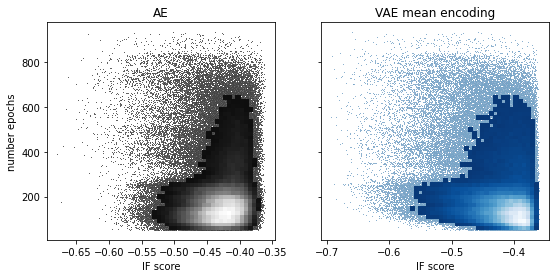

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,sharey=True, figsize=(9, 4))

sns.scatterplot(x=df_AE.if_score.values, y=df_AE.n_good_det.values, s=1, color="black", ax=ax1)
sns.histplot(x=df_AE.if_score.values, y=df_AE.n_good_det.values, bins=50, pthresh=.1, cmap="Greys_r",ax=ax1)
ax1.set_xlabel('IF score')
ax1.set_ylabel('number epochs')
ax1.set_title('AE')


sns.scatterplot(x=df_VAE.if_score.values, y=df_VAE.n_good_det.values, s=1, color="steelblue", ax=ax2)
sns.histplot(x=df_VAE.if_score.values, y=df_VAE.n_good_det.values, bins=50, pthresh=.1, cmap="Blues_r",ax=ax2)
ax2.set_xlabel('IF score')
ax2.set_title('VAE mean encoding')

plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/AE_VAE_IFscore_vs_ndet.png')

SpearmanrResult(correlation=-0.24210775545861335, pvalue=0.0)
SpearmanrResult(correlation=0.09648630713472019, pvalue=0.0)
SpearmanrResult(correlation=-0.19594197862743196, pvalue=0.0)
SpearmanrResult(correlation=-0.2293338858255063, pvalue=0.0)


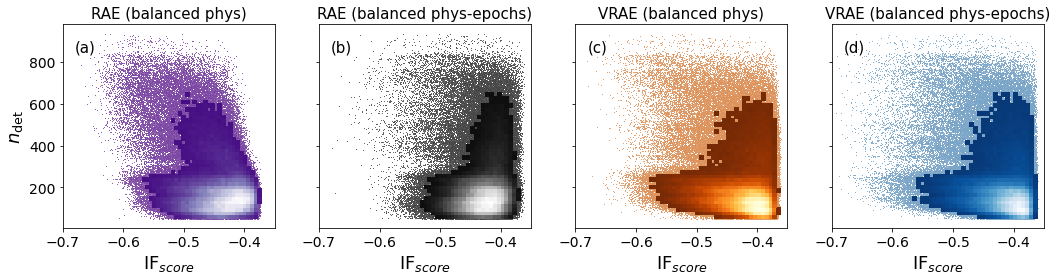

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4,sharey=True, figsize=(15, 4))

#ax1.scatter(df_AE.if_score.values,df_AE.n_good_det.values,s=0.5, alpha=0.1)
sns.scatterplot(x=df_AE_old.if_score.values, y=df_AE_old.n_good_det.values, s=1, color="indigo", ax=ax1)
sns.histplot(x=df_AE_old.if_score.values, y=df_AE_old.n_good_det.values, bins=50, pthresh=.1, cmap="Purples_r",ax=ax1)
#sns.kdeplot(x=df_AE.if_score.values, y=df_AE.n_good_det.values, levels=5, color="w", linewidths=1,ax=ax1)
ax1.set_xlabel(r'IF$_{score}$',fontsize=18)
ax1.set_ylabel(r'$n_{\mathrm{det}}$',fontsize=18)
ax1.set_title('RAE (balanced phys)',fontsize=15)
ax1.text(-0.68,850,'(a)',fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xlim(-0.7,-0.35)
print(stats.spearmanr(df_AE_old.if_score.values, df_AE_old.n_good_det.values))


#ax2.scatter(df_VAE_randenc.if_score.values,df_VAE_randenc.n_good_det.values,s=0.5, alpha=0.1)
sns.scatterplot(x=df_AE.if_score.values, y=df_AE.n_good_det.values, s=1, color="black", ax=ax2)
sns.histplot(x=df_AE.if_score.values, y=df_AE.n_good_det.values, bins=50, pthresh=.1,  cmap="Greys_r",ax=ax2)
ax2.set_xlabel(r'IF$_{score}$',fontsize=18)
#ax2.set_ylabel('number epochs')
ax2.set_title('RAE (balanced phys-epochs)',fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.text(-0.68,850,'(b)',fontsize=15)
ax2.set_xlim(-0.7,-0.35)
print(stats.spearmanr(df_AE.if_score.values, df_AE.n_good_det.values))

#ax3.scatter(df_VAE_withe11.if_score.values,df_VAE_withe11.n_good_det.values,s=0.5, alpha=0.1)
sns.scatterplot(x=df_VAE_old.if_score.values, y=df_VAE_old.n_good_det.values, s=1, color="chocolate", ax=ax3)
sns.histplot(x=df_VAE_old.if_score.values, y=df_VAE_old.n_good_det.values, bins=50, pthresh=.1, cmap="YlOrBr_r",ax=ax3)
ax3.set_xlabel(r'IF$_{score}$',fontsize=18)
ax3.text(-0.68,850,'(c)',fontsize=15)
#ax3.set_ylabel('number epochs')
ax3.set_title('VRAE (balanced phys)',fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.set_xlim(-0.7,-0.35)
print(stats.spearmanr(df_VAE_old.if_score.values, df_VAE_old.n_good_det.values))

#ax4.scatter(df_VAE_noe11.if_score.values,df_VAE_noe11.n_good_det.values,s=0.5, alpha=0.1)
sns.scatterplot(x=df_VAE.if_score.values, y=df_VAE.n_good_det.values, s=1, color="steelblue", ax=ax4)
sns.histplot(x=df_VAE.if_score.values, y=df_VAE.n_good_det.values, bins=50, pthresh=.1, cmap="Blues_r",ax=ax4)
ax4.set_xlabel(r'IF$_{score}$',fontsize=18)
ax4.text(-0.68,850,'(d)',fontsize=15)
#ax4.set_ylabel('number epochs')
ax4.set_title('VRAE (balanced phys-epochs)',fontsize=15)
ax4.set_xlim(-0.7,-0.35)
print(stats.spearmanr(df_VAE.if_score.values, df_VAE.n_good_det.values))

ax4.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()


plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/AE_VAE_balanced_comp_IFscore_vs_ndet.png',dpi=400)

e1 SpearmanrResult(correlation=-0.11926882609517815, pvalue=0.0)
e2 SpearmanrResult(correlation=0.10515583704721641, pvalue=0.0)
e3 SpearmanrResult(correlation=-0.05485818536180946, pvalue=4.463768799208335e-153)
e4 SpearmanrResult(correlation=0.04680889733692077, pvalue=6.00750731844559e-112)
e5 SpearmanrResult(correlation=0.02862498312838911, pvalue=5.484382148694317e-43)
e6 SpearmanrResult(correlation=0.009116637666712033, pvalue=1.2051117397000563e-05)
e7 SpearmanrResult(correlation=0.007110563201374842, pvalue=0.0006411792606540758)
e8 SpearmanrResult(correlation=0.041151547403556366, pvalue=6.109268137573391e-87)
e9 SpearmanrResult(correlation=0.00224371815573168, pvalue=0.28142228202681163)
e10 SpearmanrResult(correlation=0.05906392649406619, pvalue=3.647810816745525e-177)
e11 SpearmanrResult(correlation=0.14163269022348224, pvalue=0.0)
e12 SpearmanrResult(correlation=0.04227666641407704, pvalue=1.1712820224062366e-91)
e13 SpearmanrResult(correlation=0.08848446343531594, pvalue=

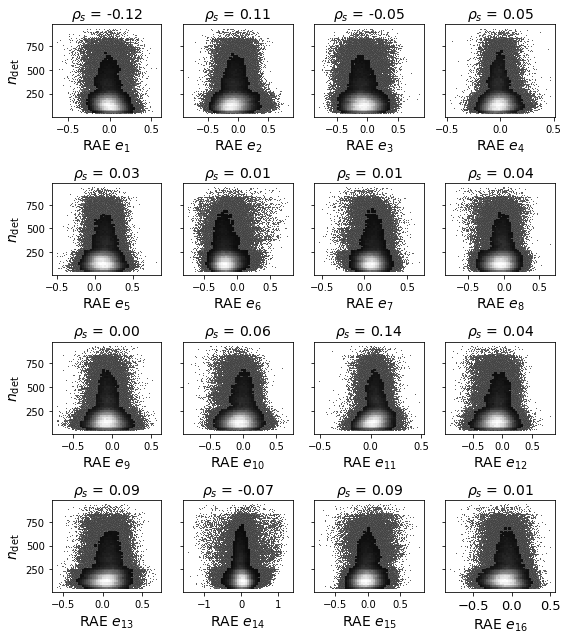

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4,sharey=True, figsize=(8, 9))

axs[0,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[1,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[2,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[3,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)

k=1
for ax in axs.reshape(-1):
  r, p = stats.spearmanr(df_AE['e'+str(k)].values, df_AE.n_good_det.values)
  ax.set_title(r"$\rho_s$ = {:.2f}".format(r),fontsize=14)
  ax.set_xlabel(r'RAE $e_{%d}$'%(k),fontsize=14)
  sns.scatterplot(x=df_AE['e'+str(k)].values, y=df_AE.n_good_det.values, s=1, color="black", ax=ax)
  sns.histplot(x=df_AE['e'+str(k)].values, y=df_AE.n_good_det.values, bins=50, pthresh=.1, cmap="Greys_r",ax=ax)
  print('e'+str(k), stats.spearmanr(df_AE['e'+str(k)].values, df_AE.n_good_det.values))

  k+=1


plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/AE_encoding_feats.png',dpi=400)


e1 SpearmanrResult(correlation=-0.5606030114437646, pvalue=0.0)
e2 SpearmanrResult(correlation=0.27368087259695506, pvalue=0.0)
e3 SpearmanrResult(correlation=0.31561698283809875, pvalue=0.0)
e4 SpearmanrResult(correlation=-0.4311349127941142, pvalue=0.0)
e5 SpearmanrResult(correlation=-0.469791614224642, pvalue=0.0)
e6 SpearmanrResult(correlation=0.3766558955576648, pvalue=0.0)
e7 SpearmanrResult(correlation=0.0942321144737446, pvalue=0.0)
e8 SpearmanrResult(correlation=-0.1287808267869955, pvalue=0.0)
e9 SpearmanrResult(correlation=-0.2674881258620655, pvalue=0.0)
e10 SpearmanrResult(correlation=-0.6369285780129293, pvalue=0.0)
e11 SpearmanrResult(correlation=0.19676587067730258, pvalue=0.0)
e12 SpearmanrResult(correlation=0.08941267872926742, pvalue=0.0)
e13 SpearmanrResult(correlation=0.09788555931884145, pvalue=0.0)
e14 SpearmanrResult(correlation=-0.4159110718745102, pvalue=0.0)
e15 SpearmanrResult(correlation=0.2159055053320389, pvalue=0.0)
e16 SpearmanrResult(correlation=-0.256

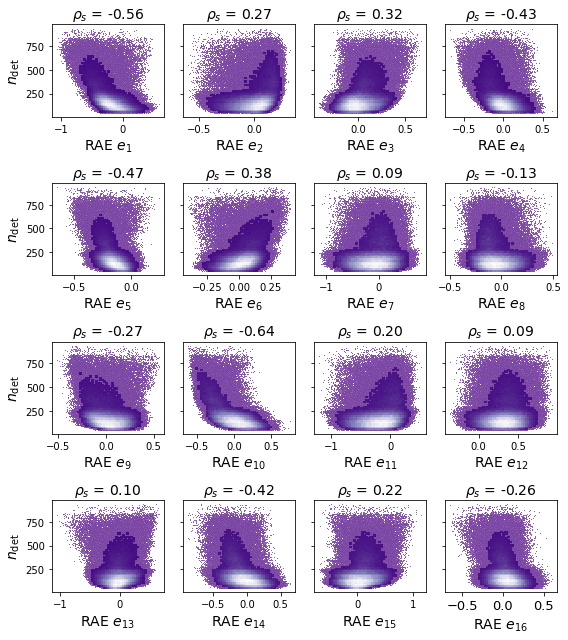

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4,sharey=True, figsize=(8, 9))

axs[0,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[1,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[2,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[3,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)

k=1
for ax in axs.reshape(-1):
  r, p = stats.spearmanr(df_AE_old['e'+str(k)].values, df_AE_old.n_good_det.values)
  ax.set_title(r"$\rho_s$ = {:.2f}".format(r),fontsize=14)
  ax.set_xlabel(r'RAE $e_{%d}$'%(k),fontsize=14)
  sns.scatterplot(x=df_AE_old['e'+str(k)].values, y=df_AE_old.n_good_det.values, s=1, color="indigo", ax=ax)
  sns.histplot(x=df_AE_old['e'+str(k)].values, y=df_AE_old.n_good_det.values, bins=50, pthresh=.1, cmap="Purples_r",ax=ax)
  print('e'+str(k), stats.spearmanr(df_AE_old['e'+str(k)].values, df_AE_old.n_good_det.values))
  

  k+=1


plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/AE_nobal_ndet_encoding_feats.png',dpi=400)

e1 SpearmanrResult(correlation=0.060406349779060974, pvalue=3.184509055441068e-185)
e2 SpearmanrResult(correlation=0.21738524089864014, pvalue=0.0)
e3 SpearmanrResult(correlation=0.01734521041203812, pvalue=8.269856553609139e-17)
e4 SpearmanrResult(correlation=0.01998033500369463, pvalue=8.584903183342494e-22)
e5 SpearmanrResult(correlation=0.06332263259007477, pvalue=2.2717979865878012e-203)
e6 SpearmanrResult(correlation=-0.018199843617522814, pvalue=2.379427515452999e-18)
e7 SpearmanrResult(correlation=0.040828366202424, pvalue=1.3184357493195287e-85)
e8 SpearmanrResult(correlation=0.10569066469383367, pvalue=0.0)
e9 SpearmanrResult(correlation=0.06868989864355352, pvalue=5.106669886142272e-239)
e10 SpearmanrResult(correlation=0.16120203122653068, pvalue=0.0)
e11 SpearmanrResult(correlation=-0.02276147877287594, pvalue=8.449171844712559e-28)
e12 SpearmanrResult(correlation=0.03236375074711772, pvalue=1.8451458280665985e-54)
e13 SpearmanrResult(correlation=-0.052625858114644056, pval

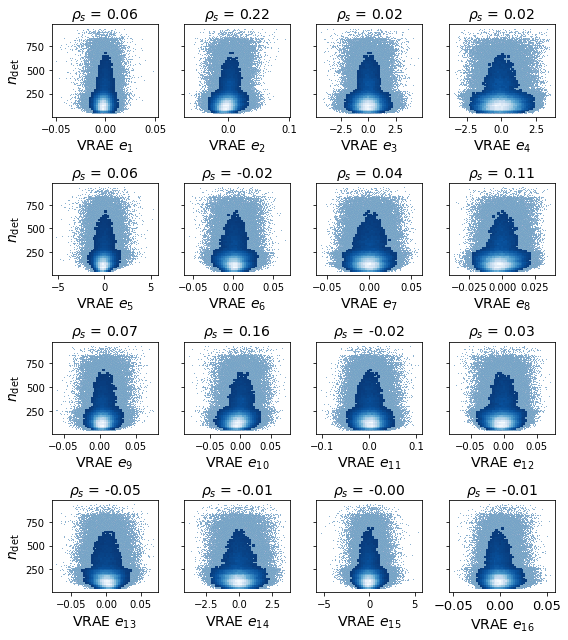

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4,sharey=True, figsize=(8, 9))

axs[0,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[1,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[2,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[3,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)

k=1
for ax in axs.reshape(-1):
  r, p = stats.spearmanr(df_VAE['e'+str(k)].values, df_VAE.n_good_det.values)
  ax.set_title(r"$\rho_s$ = {:.2f}".format(r),fontsize=14)
  ax.set_xlabel(r'VRAE $e_{%d}$'%(k),fontsize=14)
  sns.scatterplot(x=df_VAE['e'+str(k)].values, y=df_VAE.n_good_det.values, s=1, color="steelblue", ax=ax)
  sns.histplot(x=df_VAE['e'+str(k)].values, y=df_VAE.n_good_det.values, bins=50, pthresh=.1, cmap="Blues_r",ax=ax)
  print('e'+str(k), stats.spearmanr(df_VAE['e'+str(k)].values, df_VAE.n_good_det.values))
  k+=1

plt.tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/VAE_encoding_feats.png',dpi=400)

e1 SpearmanrResult(correlation=-0.046788241937377094, pvalue=1.4575660021412264e-107)
e2 SpearmanrResult(correlation=-0.07378013267498988, pvalue=7.225430082602431e-265)
e3 SpearmanrResult(correlation=-0.008801234289999085, pvalue=3.443066584964111e-05)
e4 SpearmanrResult(correlation=0.022050493779351567, pvalue=3.1112330337800105e-25)
e5 SpearmanrResult(correlation=0.0146450287201841, pvalue=5.485882367283099e-12)
e6 SpearmanrResult(correlation=-0.07064020448770635, pvalue=6.311844789764415e-243)
e7 SpearmanrResult(correlation=0.07373767895191269, pvalue=1.4519213128067467e-264)
e8 SpearmanrResult(correlation=-0.13329206473801214, pvalue=0.0)
e9 SpearmanrResult(correlation=0.11289047156657052, pvalue=0.0)
e10 SpearmanrResult(correlation=-0.0900519563230754, pvalue=0.0)
e11 SpearmanrResult(correlation=0.24040465317758325, pvalue=0.0)
e12 SpearmanrResult(correlation=-0.26949622137178947, pvalue=0.0)
e13 SpearmanrResult(correlation=-0.0395454943111496, pvalue=2.3131972915883603e-77)
e14 

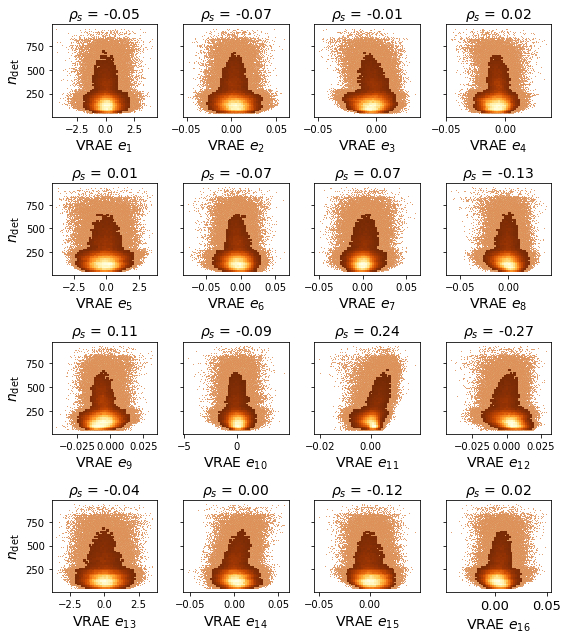

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4,sharey=True, figsize=(8, 9))

axs[0,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[1,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[2,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)
axs[3,0].set_ylabel(r'$n_{\mathrm{det}}$',fontsize=14)

k=1
for ax in axs.reshape(-1):
  r, p = stats.spearmanr(df_VAE_old['e'+str(k)].values, df_VAE_old.n_good_det.values)
  ax.set_title(r"$\rho_s$ = {:.2f}".format(r),fontsize=14)
  ax.set_xlabel(r'VRAE $e_{%d}$'%(k),fontsize=14)
  sns.scatterplot(x=df_VAE_old['e'+str(k)].values, y=df_VAE_old.n_good_det.values, s=1, color="chocolate", ax=ax)
  sns.histplot(x=df_VAE_old['e'+str(k)].values, y=df_VAE_old.n_good_det.values, bins=50, pthresh=.1, cmap="YlOrBr_r",ax=ax)
  print('e'+str(k), stats.spearmanr(df_VAE_old['e'+str(k)].values, df_VAE_old.n_good_det.values))
  k+=1

plt.tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/VAE_nobal_ndet_encoding_feats.png',dpi=400)

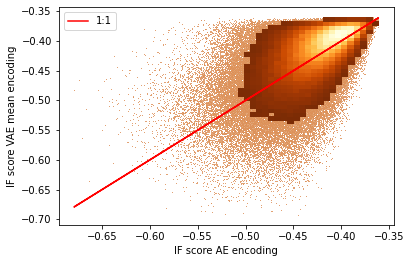

In [ ]:
join_df = df_AE.set_index('oid_alerce').join(df_VAE.set_index('oid_alerce'), how='inner', lsuffix='_AE', rsuffix='_VAE')

sns.scatterplot(x=join_df.if_score_AE.values, y=join_df.if_score_VAE.values, s=1, color="chocolate")
sns.histplot(x=join_df.if_score_AE.values, y=join_df.if_score_VAE.values, bins=50, pthresh=.1, cmap="YlOrBr_r")

plt.plot(join_df.if_score_AE.values,join_df.if_score_AE.values,'r-',label='1:1')
plt.xlabel('IF score AE encoding')
plt.ylabel('IF score VAE mean encoding')
plt.legend()


Counter({'Q': 209173, 'QR': 11407, 'A': 3321, 'X': 2676, 'R': 1595, 'FSRQ': 872, 'BLLac': 797, 'AR': 372, 'type2': 156, 'BZU': 64, 'type2 R': 24})


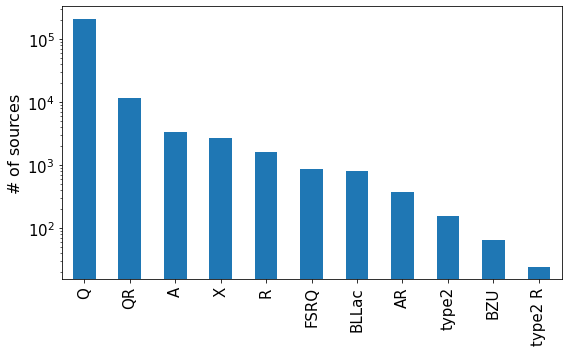

In [ ]:
class_counts = Counter(df_VAE['class'])
class_counts.most_common()
print(class_counts)

df_hist = pd.DataFrame.from_dict(class_counts, orient='index',columns=['number'])
df_hist = df_hist.sort_values(by=['number'],ascending=False)
#print(df_hist)
df_hist.plot(kind='bar',legend=False,figsize=(8,5))


plt.yscale('log')
#plt.title('sources classified')
plt.ylabel(r'$\#$ of sources',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/numer_sources_per_class.pdf')

Counter({'Q': 5774, 'A': 873, 'QR': 747, 'BLLac': 518, 'FSRQ': 312, 'X': 247, 'AR': 191, 'R': 92, 'BZU': 37, 'type2 R': 10, 'type2': 10})


Text(0, 0.5, '$\\#$ of sources')

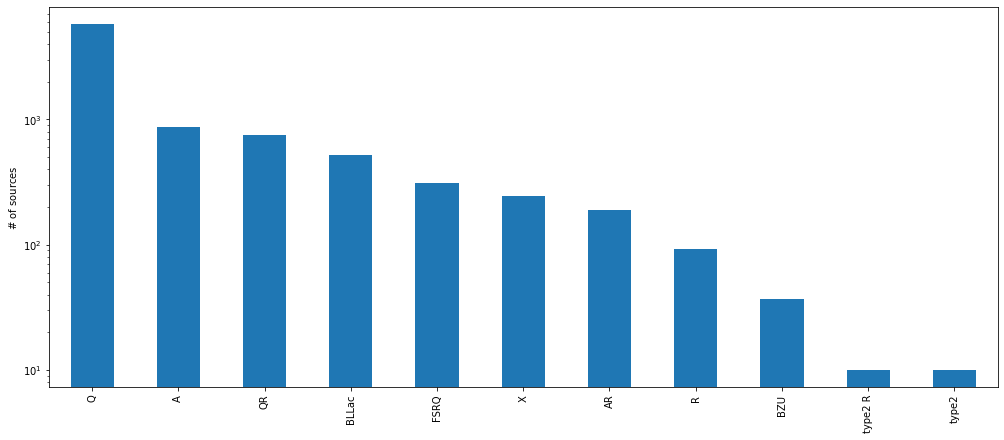

In [ ]:
class_counts_anomalous = Counter(df_VAE.loc[(df_VAE.if_score<=-0.5763301566355188) | (df_VAE.chi2_gband>=3),'class'])
class_counts_anomalous.most_common()
print(class_counts_anomalous)

df_hist = pd.DataFrame.from_dict(class_counts_anomalous, orient='index',columns=['number'])
df_hist = df_hist.sort_values(by=['number'],ascending=False)
#print(df_hist)
df_hist.plot(kind='bar',legend=False,figsize=(17,7))


plt.yscale('log')
#plt.title('sources classified')
plt.ylabel(r'$\#$ of sources')

Counter({'Q': 22068, 'QR': 1768, 'A': 823, 'AR': 68, 'type2': 26, 'type2 R': 2})


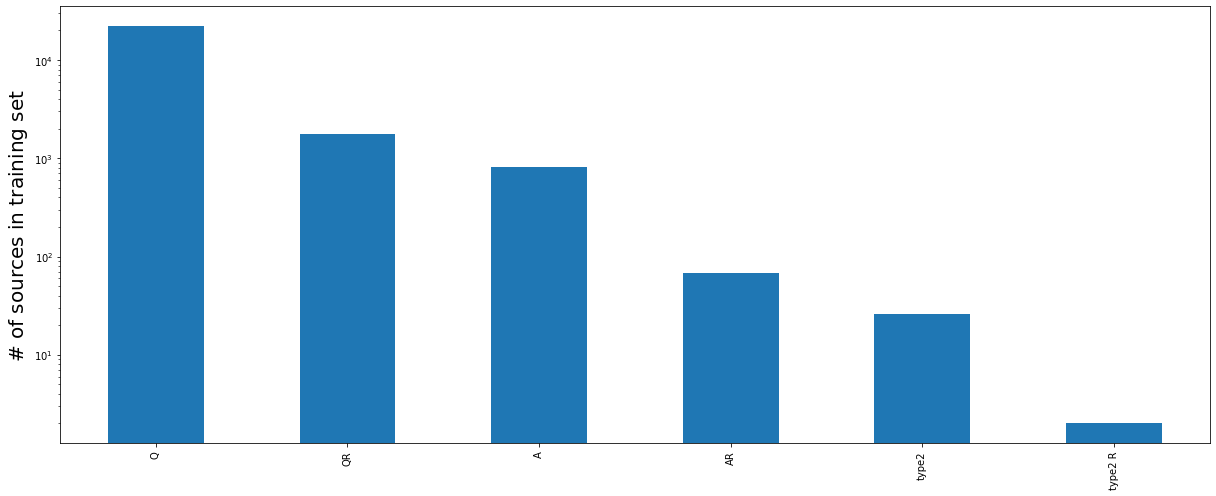

In [ ]:
class_counts_train = Counter(df_VAE_train['class'])
class_counts_train.most_common()
print(class_counts_train)

df_hist = pd.DataFrame.from_dict(class_counts_train, orient='index',columns=['number'])
df_hist = df_hist.sort_values(by=['number'],ascending=False)
#print(df_hist)
df_hist.plot(kind='bar',legend=False,figsize=(17,7))


plt.yscale('log')
plt.ylabel(r'$\#$ of sources in training set',fontsize=20)
plt.tight_layout()


{'A': 0.26287262872628725, 'Q': 0.027603945059830857, 'R': 0.05768025078369906, 'BLLac': 0.6499372647427855, 'QR': 0.06548610502323135, 'AR': 0.5134408602150538, 'X': 0.09230194319880418, 'type2 R': 0.4166666666666667, 'BZU': 0.578125, 'FSRQ': 0.3577981651376147, 'type2': 0.0641025641025641}


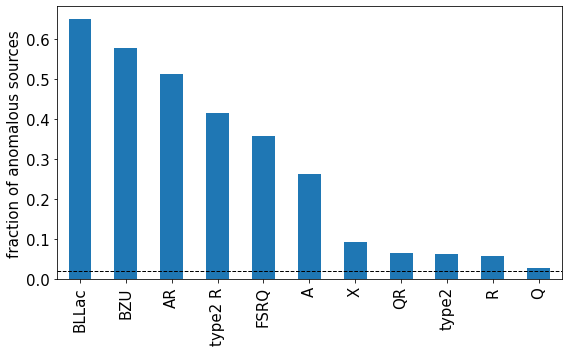

In [ ]:
res = {key: float(class_counts_anomalous[key]) / class_counts.get(key, 0)
                        for key in class_counts_anomalous.keys()}

print(res)

df_hist = pd.DataFrame.from_dict(res, orient='index',columns=['number'])
df_hist = df_hist.sort_values(by=['number'],ascending=False)
#print(df_hist)
df_hist.plot(kind='bar',legend=False,figsize=(8,5),label='class')
plt.axhline(0.02, color='k', linestyle='dashed', linewidth=1,label='2%')

#plt.yscale('log')
#plt.title('sources classified')
#plt.legend()
plt.tick_params(axis='both', which='major', labelsize=15)

plt.ylabel(r'fraction of anomalous sources', fontsize=15)
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/anomalous_fraction_per_class.pdf')

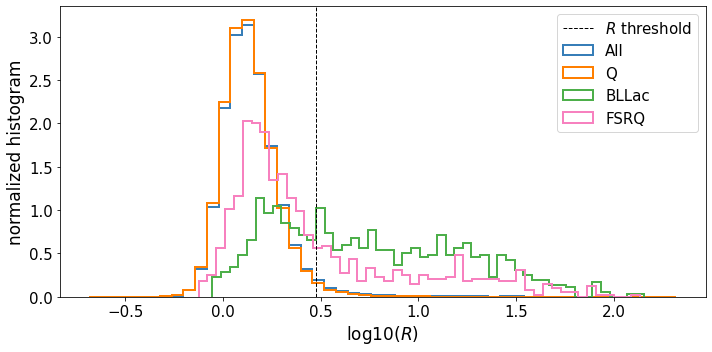

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.hist(np.log10(df_VAE.chi2_gband.values),bins=50,density=True,stacked=True,linewidth=2, color='#377eb8', histtype='step',label="All")
plt.hist(np.log10(df_VAE[df_VAE['class']=="Q"].chi2_gband.values),bins=50,density=True,stacked=True,linewidth=2, color='#ff7f00', histtype='step',label="Q")
plt.hist(np.log10(df_VAE[df_VAE['class']=="BLLac"].chi2_gband.values),bins=50,density=True,stacked=True,linewidth=2, color='#4daf4a',histtype='step',label="BLLac")
plt.hist(np.log10(df_VAE[df_VAE['class']=="FSRQ"].chi2_gband.values),bins=50,density=True,stacked=True,linewidth=2, color='#f781bf',histtype='step',label="FSRQ")

plt.axvline(np.log10(3), color='k', linestyle='dashed', linewidth=1,label=r'$R$ threshold')
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'log10($R$)',fontsize=17)
plt.ylabel('normalized histogram',fontsize=17)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/chi2_Q_blazars.pdf')

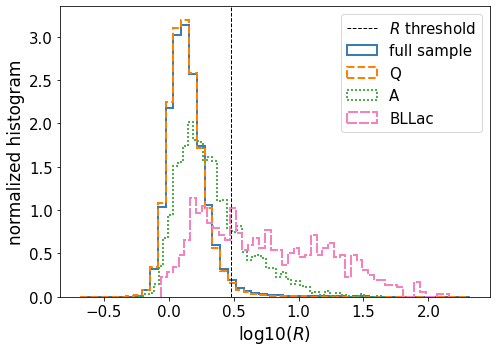

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.hist(np.log10(df_VAE.chi2_gband.values),bins=50,density=True,stacked=True,linewidth=2, color='#377eb8', histtype='step',label="full sample")
plt.hist(np.log10(df_VAE[df_VAE['class']=="Q"].chi2_gband.values),bins=50,density=True,stacked=True,linewidth=2, linestyle='dashed', color='#ff7f00', histtype='step',label="Q")
plt.hist(np.log10(df_VAE[df_VAE['class']=="A"].chi2_gband.values),bins=50,density=True,stacked=True,linewidth=2,linestyle=(0,(1,1)), color='#4daf4a',histtype='step',label="A")
plt.hist(np.log10(df_VAE[df_VAE['class']=="BLLac"].chi2_gband.values),bins=50,density=True,stacked=True,linewidth=2, linestyle=(0,(5,1)),color='#f781bf',histtype='step',label="BLLac")

plt.axvline(np.log10(3), color='k', linestyle='dashed', linewidth=1,label=r'$R$ threshold')
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'log10($R$)',fontsize=17)
plt.ylabel('normalized histogram',fontsize=17)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/chi2_Q_A.pdf')

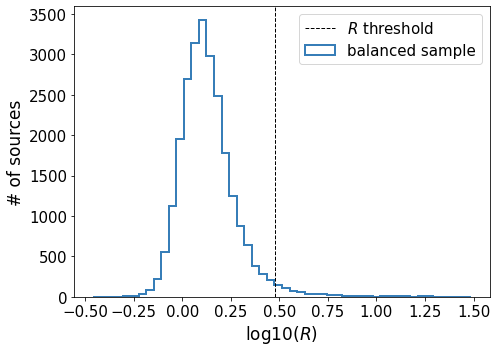

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.hist(np.log10(df_VAE_train.chi2_gband.values),bins=50,stacked=True,linewidth=2, color='#377eb8', histtype='step',label="balanced sample")

plt.axvline(np.log10(3), color='k', linestyle='dashed', linewidth=1,label=r'$R$ threshold')
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'log10($R$)',fontsize=17)
plt.ylabel('# of sources',fontsize=17)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/chi2_balanced_sample.pdf')

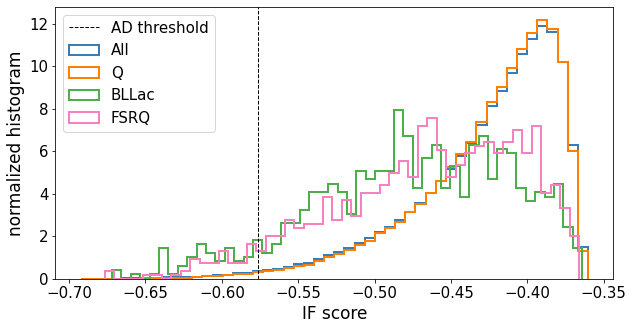

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.hist(df_VAE.if_score.values,bins=50,density=True,linewidth=2, color='#377eb8',stacked=True, histtype='step',label="All")
plt.hist(df_VAE[df_VAE['class']=="Q"].if_score.values,bins=50,density=True,linewidth=2, color='#ff7f00',stacked=True, histtype='step',label="Q")
plt.hist(df_VAE[df_VAE['class']=="BLLac"].if_score.values,bins=50,density=True,linewidth=2, color='#4daf4a',stacked=True, histtype='step',label="BLLac")
plt.hist(df_VAE[df_VAE['class']=="FSRQ"].if_score.values,bins=50,density=True,linewidth=2, color= '#f781bf',stacked=True, histtype='step',label="FSRQ")

plt.axvline(-0.5763301566355188, color='k', linestyle='dashed', linewidth=1,label='AD threshold')
plt.legend(loc='upper left',fontsize=15)
plt.xlabel(r'IF score',fontsize=17)
plt.ylabel('normalized histogram',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/IF_score_Q_blazars.pdf')

In [ ]:
'''feat_list = ["e1", "e2", "e3", "e4", "e5", "e6", "e7", "e8","e9", "e10","e11",
               "e12", "e13", "e14", "e15", "e16"]

df_feat_VAE = df_VAE[feat_list]

X_reduced_train =TSNE(n_components=2, perplexity=100, random_state=32, n_iter=500).fit_transform(df_feat_VAE.values)'''

'feat_list = ["e1", "e2", "e3", "e4", "e5", "e6", "e7", "e8","e9", "e10","e11",\n               "e12", "e13", "e14", "e15", "e16"]\n\ndf_feat_VAE = df_VAE[feat_list]\n\nX_reduced_train =TSNE(n_components=2, perplexity=100, random_state=32, n_iter=500).fit_transform(df_feat_VAE.values)'

In [ ]:
#plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1],c=np.log10(df_VAE.chi2_gband.values))

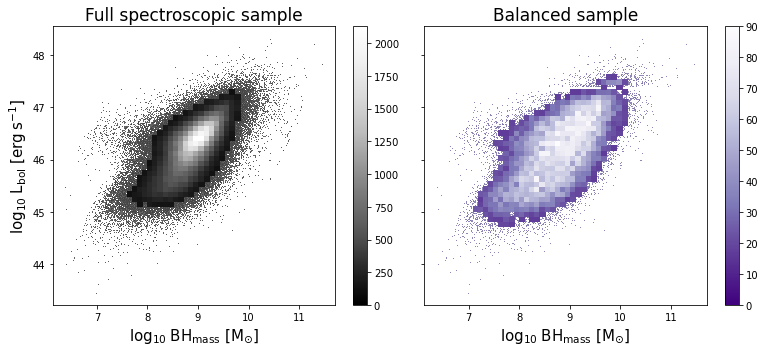

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,sharey=True, figsize=(11, 5))

sns.scatterplot(x=df_VAE_spec.LOG_MBH.values, y=df_VAE_spec.LOG_LBOL.values, s=1, color="black", ax=ax1)
sns.histplot(x=df_VAE_spec.LOG_MBH.values, y=df_VAE_spec.LOG_LBOL.values, bins=50, pthresh=.1, cmap="Greys_r",cbar=True,ax=ax1)
ax1.set_xlabel(r'$\mathrm{log}_{10} \; \mathrm{BH}_{\mathrm{mass}}$ [$\mathrm{M}_{\odot}$]',fontsize=15)
ax1.set_ylabel(r'$\mathrm{log}_{10} \; \mathrm{L}_{\mathrm{bol}}$ [$\mathrm{erg} \:\mathrm{s}^{-1} $]',fontsize=15)
ax1.set_title('Full spectroscopic sample',fontsize=17)


sns.scatterplot(x=df_VAE_train.LOG_MBH.values, y=df_VAE_train.LOG_LBOL.values, s=1, color="darkslateblue", ax=ax2)
sns.histplot(x=df_VAE_train.LOG_MBH.values, y=df_VAE_train.LOG_LBOL.values, bins=50, pthresh=.1, cmap="Purples_r",cbar=True,ax=ax2)
ax2.set_xlabel(r'$\mathrm{log}_{10} \; \mathrm{BH}_{\mathrm{mass}}$ [$\mathrm{M}_{\odot}$]',fontsize=15)
ax2.set_title('Balanced sample',fontsize=17)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/spec_prop_full_training_sets.png',dpi=400)

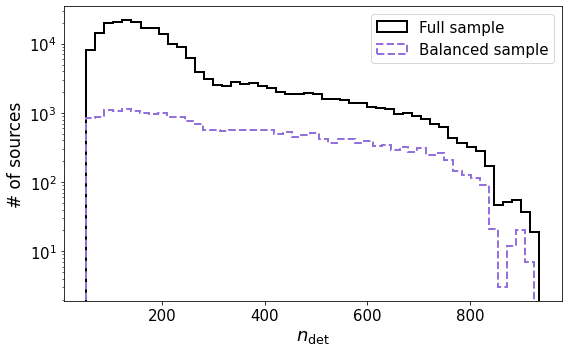

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.hist(df_VAE.n_good_det.values,bins=50,log=True,linewidth=2, color='black',stacked=True, histtype='step',label="Full sample")
plt.hist(df_VAE_train.n_good_det.values,bins=50,log=True,linewidth=2, linestyle='dashed', color= 'mediumpurple',stacked=True, histtype='step',label="Balanced sample")

plt.legend(loc='upper right',fontsize=15)
plt.xlabel(r'$n_{\mathrm{det}}$',fontsize=18)
plt.ylabel('# of sources',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/CSAGNs/plots_4paper/ndet_full_vs_train_samples.pdf')